In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


In [2]:
import requests
from io import StringIO

In [3]:
url="http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
source=requests.get(url).text
poll_data=StringIO(source)

In [4]:
poll=pd.read_csv("2012-general-election-romney-vs-obama.csv")

In [5]:
poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


/home/frosted007/.local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


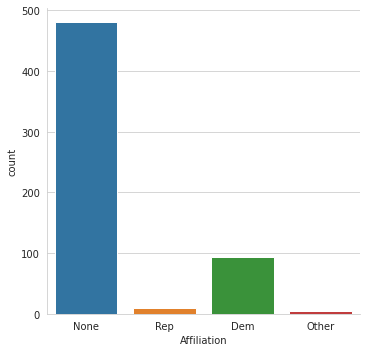

In [6]:
sns.factorplot("Affiliation",data=poll,kind="count")

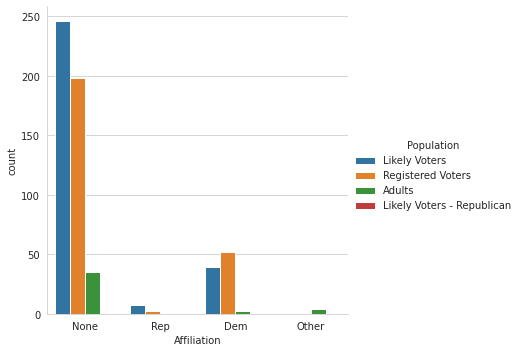

In [7]:
sns.factorplot("Affiliation",data=poll,kind="count",hue="Population")

In [8]:
poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [9]:
avg=DataFrame(poll.mean())
avg.drop("Number of Observations",axis=0,inplace=True)
avg.drop("Question Text",axis=0,inplace=True)
avg.drop("Question Iteration",axis=0,inplace=True)
avg.drop("Other",axis=0,inplace=True)

In [10]:
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827


In [11]:
std=DataFrame(poll.std())
std.drop("Number of Observations",axis=0,inplace=True)
std.drop("Question Text",axis=0,inplace=True)
std.drop("Question Iteration",axis=0,inplace=True)
std.drop("Other",axis=0,inplace=True)

In [12]:
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754


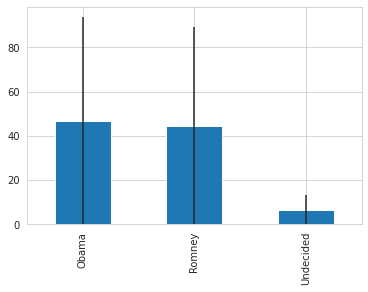

In [13]:
avg.plot(yerr=avg,kind="bar",legend=False)

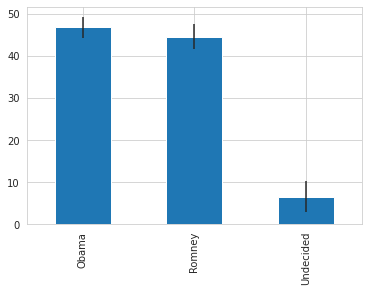

In [14]:
avg.plot(yerr=std,kind="bar",legend=False)

In [15]:
undecided=pd.concat([avg,std],axis=1)

In [16]:
undecided.columns=["avearge","STD"]

In [17]:
undecided

,avearge,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


In [18]:
poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


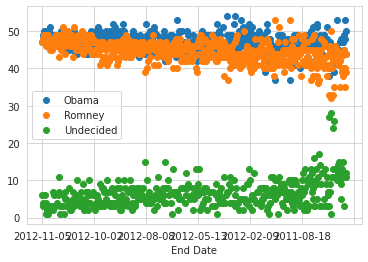

In [19]:
poll.plot(x="End Date",y=["Obama","Romney","Undecided"],linestyle="",marker="o")

In [20]:
from datetime import datetime

In [21]:
poll["difference"]=(poll.Obama-poll.Romney)/100

In [22]:
poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [23]:
poll2=poll.groupby(['Start Date'],as_index=False).mean()

In [24]:
poll2

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,difference
0,2009-03-13,1403.000000,44.00,44.00,12.000000,NaN,NaN,1,0.0000
1,2009-04-17,686.000000,50.00,39.00,11.000000,NaN,NaN,1,0.1100
2,2009-05-14,1000.000000,53.00,35.00,12.000000,NaN,NaN,1,0.1800
3,2009-06-12,638.000000,48.00,40.00,12.000000,NaN,NaN,1,0.0800
4,2009-07-15,577.000000,49.00,40.00,11.000000,NaN,NaN,1,0.0900
...,...,...,...,...,...,...,...,...,...
352,2012-10-31,10420.250000,48.00,46.50,4.000000,2.0,NaN,1,0.0150
353,2012-11-01,1989.000000,49.00,47.25,2.400000,1.5,NaN,1,0.0175
354,2012-11-02,1041.750000,49.25,48.50,2.000000,1.0,NaN,1,0.0075
355,2012-11-03,1310.833333,48.50,48.00,4.333333,1.0,NaN,1,0.0050


In [25]:
poll2.drop('Question Text',axis=1,inplace=True)

In [26]:
poll2

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Iteration,difference
0,2009-03-13,1403.000000,44.00,44.00,12.000000,NaN,1,0.0000
1,2009-04-17,686.000000,50.00,39.00,11.000000,NaN,1,0.1100
2,2009-05-14,1000.000000,53.00,35.00,12.000000,NaN,1,0.1800
3,2009-06-12,638.000000,48.00,40.00,12.000000,NaN,1,0.0800
4,2009-07-15,577.000000,49.00,40.00,11.000000,NaN,1,0.0900
...,...,...,...,...,...,...,...,...
352,2012-10-31,10420.250000,48.00,46.50,4.000000,2.0,1,0.0150
353,2012-11-01,1989.000000,49.00,47.25,2.400000,1.5,1,0.0175
354,2012-11-02,1041.750000,49.25,48.50,2.000000,1.0,1,0.0075
355,2012-11-03,1310.833333,48.50,48.00,4.333333,1.0,1,0.0050


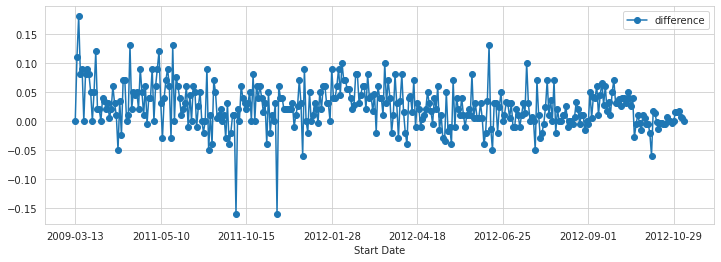

In [27]:
poll2.plot("Start Date","difference",marker='o',figsize=(12,4),linestyle='-')

In [28]:
x=0
xlimit=[]
for data in poll2["Start Date"]:
    if data[0:7]=='2012-10':
        xlimit.append(x)
        x=x+1
    else:
        x=x+1

In [29]:
print(min(xlimit))

325


In [30]:
print(max(xlimit))

352


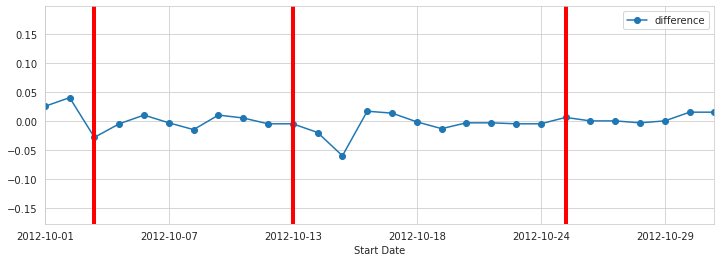

In [31]:
poll2.plot("Start Date","difference",marker='o',figsize=(12,4),linestyle='-',xlim=(325,352))
#october 3rd
plt.axvline(x=325+2,linewidth=4,color="red")
#oct 11th
plt.axvline(x=325+10,linewidth=4,color="red")
#oct 22nd
plt.axvline(x=325+21,linewidth=4,color="red")

In [32]:
donor=pd.read_csv("Election_Donor_Data.csv")

/home/frosted007/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
donor.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [34]:
donor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [35]:
donor.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num'],
      dtype='object')

In [36]:
donor["contb_receipt_amt"].value_counts()

100.00    178188
50.00     137584
25.00     110345
250.00     91182
500.00     57984
           ...  
97.15          1
122.32         1
188.65         1
122.40         1
132.12         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

In [37]:
don_std=donor["contb_receipt_amt"].std()
don_mean=donor["contb_receipt_amt"].mean()

In [38]:
don_std

3749.666723292233

In [39]:
don1=donor["contb_receipt_amt"].copy()

In [40]:
don1.sort_values()

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

In [41]:
top_donor=don1[don1>0]

In [42]:
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

In [43]:
com_dom=top_donor[top_donor<2500]

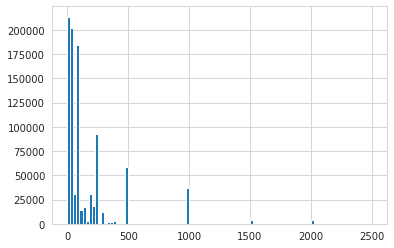

In [44]:
com_dom.hist(bins=100)

In [45]:
donor.columns


Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num'],
      dtype='object')

In [46]:
candidates=donor.cand_nm.unique()

In [47]:
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [48]:
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donor['Party'] = donor.cand_nm.map(party_map)

In [49]:
donor=donor[donor.contb_receipt_amt>0]

In [50]:
donor.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [51]:
donor.groupby("cand_nm")["contb_receipt_amt"].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [52]:
donor.groupby("cand_nm")["contb_receipt_amt"].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [53]:
sum1=donor.groupby("cand_nm")["contb_receipt_amt"].sum()
i=0
for t in sum1:
    print("donation raised by {} is {} dollars".format(sum1.index[i],int(t)))
    i+=1
    print("\n")

donation raised by Bachmann, Michelle is 2711439 dollars


donation raised by Cain, Herman is 7101081 dollars


donation raised by Gingrich, Newt is 12832769 dollars


donation raised by Huntsman, Jon is 3330373 dollars


donation raised by Johnson, Gary Earl is 566961 dollars


donation raised by McCotter, Thaddeus G is 39030 dollars


donation raised by Obama, Barack is 135877427 dollars


donation raised by Paul, Ron is 21009619 dollars


donation raised by Pawlenty, Timothy is 6004819 dollars


donation raised by Perry, Rick is 20305753 dollars


donation raised by Roemer, Charles E. 'Buddy' III is 373009 dollars


donation raised by Romney, Mitt is 88335907 dollars


donation raised by Santorum, Rick is 11043159 dollars




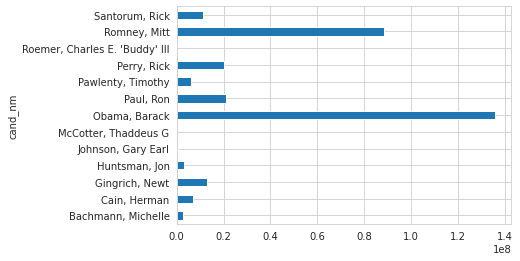

In [91]:
sum1.plot(kind="barh")

In [55]:
donor.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'Party'],
      dtype='object')

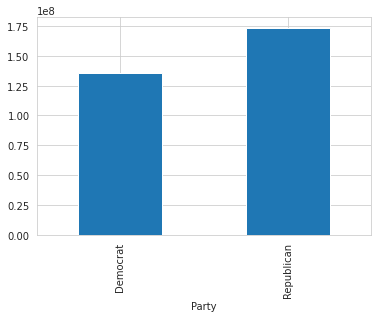

In [56]:
donor.groupby("Party")["contb_receipt_amt"].sum().plot(kind="bar")

In [57]:
occupation=donor.pivot_table('contb_receipt_amt',index="contbr_occupation",columns="Party",aggfunc="sum")

In [58]:
occupation

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN


In [60]:
occupation1=occupation[occupation.sum(1)>1000000]

In [63]:
occupation1.shape

(31, 2)

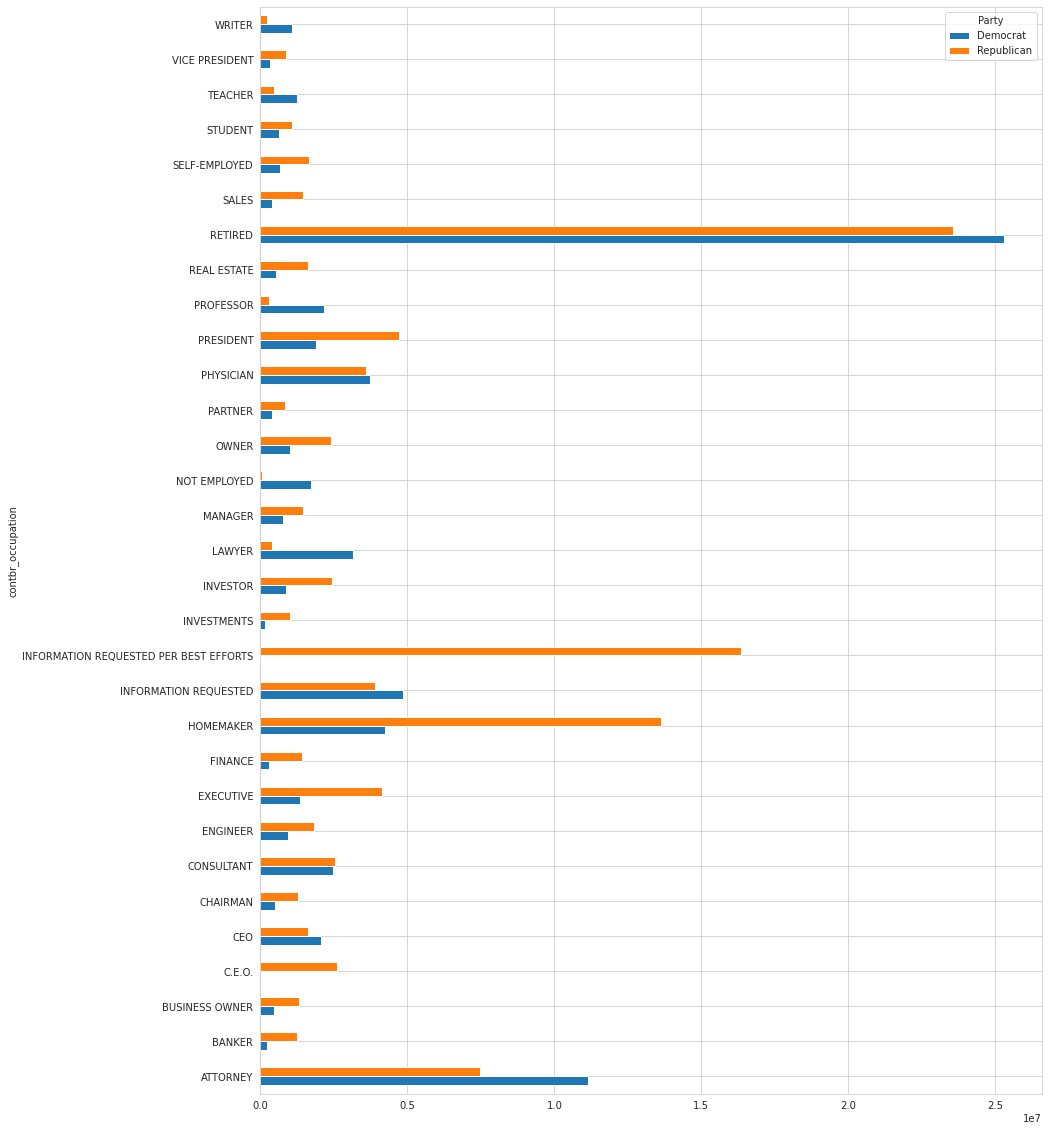

In [66]:
occupation1.plot(kind="barh",figsize=(14,20))

In [73]:
occupation1.drop(["INFORMATION REQUESTED PER BEST EFFORTS"])

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
BANKER,224084.40,1.259469e+06
BUSINESS OWNER,449979.30,1.323342e+06
C.E.O.,1690.00,2.592983e+06
CEO,2073284.79,1.618057e+06
CHAIRMAN,496547.00,1.296093e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06


In [76]:
occupation1.index

Index(['ATTORNEY', 'BANKER', 'BUSINESS OWNER', 'C.E.O.', 'CEO', 'CHAIRMAN',
       'CONSULTANT', 'ENGINEER', 'EXECUTIVE', 'FINANCE', 'HOMEMAKER',
       'INFORMATION REQUESTED', 'INFORMATION REQUESTED PER BEST EFFORTS',
       'INVESTMENTS', 'INVESTOR', 'LAWYER', 'MANAGER', 'NOT EMPLOYED', 'OWNER',
       'PARTNER', 'PHYSICIAN', 'PRESIDENT', 'PROFESSOR', 'REAL ESTATE',
       'RETIRED', 'SALES', 'SELF-EMPLOYED', 'STUDENT', 'TEACHER',
       'VICE PRESIDENT', 'WRITER'],
      dtype='object', name='contbr_occupation')

In [81]:
main=occupation1.drop(["INFORMATION REQUESTED"])
main=main.drop(["INFORMATION REQUESTED PER BEST EFFORTS"])

In [82]:
main

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
BANKER,224084.40,1.259469e+06
BUSINESS OWNER,449979.30,1.323342e+06
C.E.O.,1690.00,2.592983e+06
CEO,2073284.79,1.618057e+06
CHAIRMAN,496547.00,1.296093e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06


In [83]:
main.loc["CEO"]=main.loc["CEO"]+main.loc["C.E.O."]

In [89]:
main

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
BANKER,224084.40,1.259469e+06
BUSINESS OWNER,449979.30,1.323342e+06
CEO,2074974.79,4.211041e+06
CHAIRMAN,496547.00,1.296093e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
FINANCE,296031.40,1.402515e+06


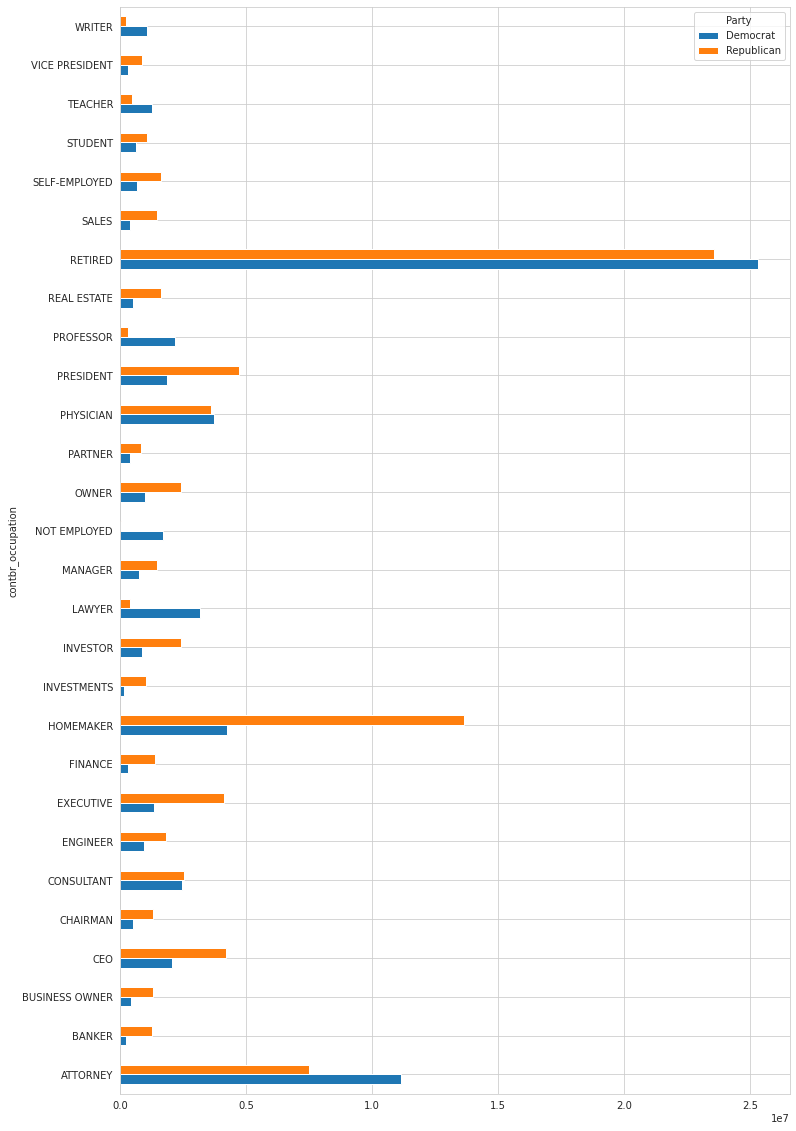

In [90]:
main.plot(kind="barh",figsize=(12,20))